In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [3]:
df=pd.read_csv("E:\ExcelR\Data Science\Assignment\Decision Tree\Fraud_check.csv")
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


In [5]:
df.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [6]:
df.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


<Axes: >

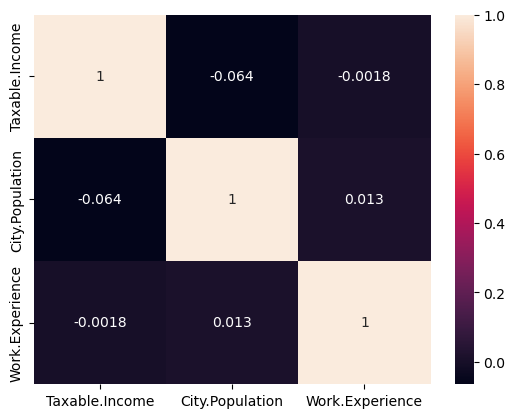

In [7]:
sns.heatmap(df.corr(), annot=True)

In [8]:
df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

<Axes: >

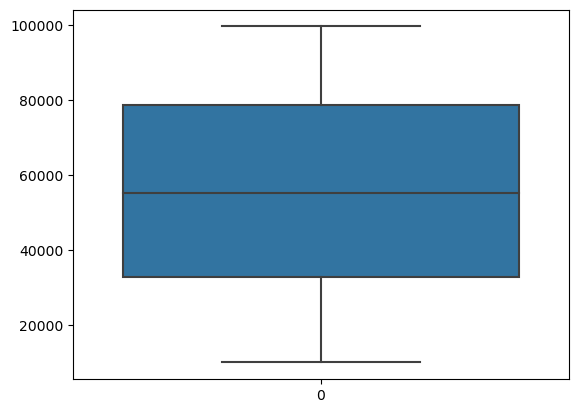

In [9]:
sns.boxplot(df['Taxable.Income'])

In [10]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['Marital.Status']= LE.fit_transform(df['Marital.Status'])
df['Undergrad']= LE.fit_transform(df['Undergrad'])
df['Urban']= LE.fit_transform(df['Urban'])
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [11]:
data=df[['Taxable.Income','City.Population','Work.Experience','Undergrad','Marital.Status','Urban']]
data.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad,Marital.Status,Urban
0,68833,50047,10,0,2,1
1,33700,134075,18,1,0,1
2,36925,160205,30,0,1,1
3,50190,193264,15,1,2,1
4,81002,27533,28,0,1,0


In [13]:
# Taxable income is <=30000 means Risky(0) otherwise Good(1)
data['Taxable.Income']=[0 if i<=30000 else 1 for i in data['Taxable.Income']]
data

,Taxable.Income,City.Population,Work.Experience,Undergrad,Marital.Status,Urban
0,0,50047,10,0,2,1
1,0,134075,18,1,0,1
2,0,160205,30,0,1,1
3,0,193264,15,1,2,1
4,0,27533,28,0,1,0
...,...,...,...,...,...,...
595,0,39492,7,1,0,1
596,0,55369,2,1,0,1
597,0,154058,0,0,0,1
598,0,180083,17,1,1,0


In [14]:
#remove outliers
from sklearn.ensemble import IsolationForest
clf = IsolationForest(random_state=10,contamination=.01)
clf.fit(data)

IsolationForest(contamination=0.01, random_state=10)

In [15]:
y_pred_outliers = clf.predict(data)
y_pred_outliers     
 #-1 for outliers and 1 for inliers.

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [16]:
data['Outliers']=y_pred_outliers
data

,Taxable.Income,City.Population,Work.Experience,Undergrad,Marital.Status,Urban,Outliers
0,0,50047,10,0,2,1,1
1,0,134075,18,1,0,1,1
2,0,160205,30,0,1,1,1
3,0,193264,15,1,2,1,1
4,0,27533,28,0,1,0,1
...,...,...,...,...,...,...,...
595,0,39492,7,1,0,1,1
596,0,55369,2,1,0,1,1
597,0,154058,0,0,0,1,1
598,0,180083,17,1,1,0,1


In [17]:
data[data.Outliers==-1]   

,Taxable.Income,City.Population,Work.Experience,Undergrad,Marital.Status,Urban,Outliers
24,0,28495,30,0,0,0,-1
145,0,197422,2,0,0,1,-1
159,0,28504,1,1,2,0,-1
280,0,33184,1,0,0,0,-1
414,0,27300,1,0,0,1,-1
574,0,28768,29,1,0,1,-1


In [18]:
data1= data.drop(data.index[[16,34,126,168,280,541]],axis=0).reset_index()
data1

,index,Taxable.Income,City.Population,Work.Experience,Undergrad,Marital.Status,Urban,Outliers
0,0,0,50047,10,0,2,1,1
1,1,0,134075,18,1,0,1,1
2,2,0,160205,30,0,1,1,1
3,3,0,193264,15,1,2,1,1
4,4,0,27533,28,0,1,0,1
...,...,...,...,...,...,...,...,...
589,595,0,39492,7,1,0,1,1
590,596,0,55369,2,1,0,1,1
591,597,0,154058,0,0,0,1,1
592,598,0,180083,17,1,1,0,1


In [19]:
data1=data1.drop(['Outliers','index'],axis=1)

In [20]:
data1

,Taxable.Income,City.Population,Work.Experience,Undergrad,Marital.Status,Urban
0,0,50047,10,0,2,1
1,0,134075,18,1,0,1
2,0,160205,30,0,1,1
3,0,193264,15,1,2,1
4,0,27533,28,0,1,0
...,...,...,...,...,...,...
589,0,39492,7,1,0,1
590,0,55369,2,1,0,1
591,0,154058,0,0,0,1
592,0,180083,17,1,1,0


<Axes: xlabel='Undergrad', ylabel='count'>

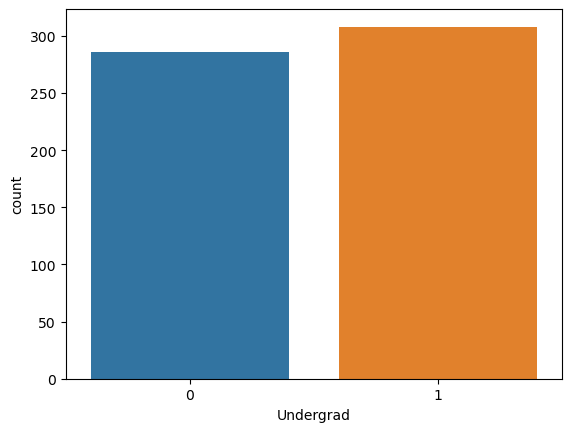

In [23]:
sns.countplot(x = data1['Undergrad'])

<Axes: xlabel='Marital.Status', ylabel='count'>

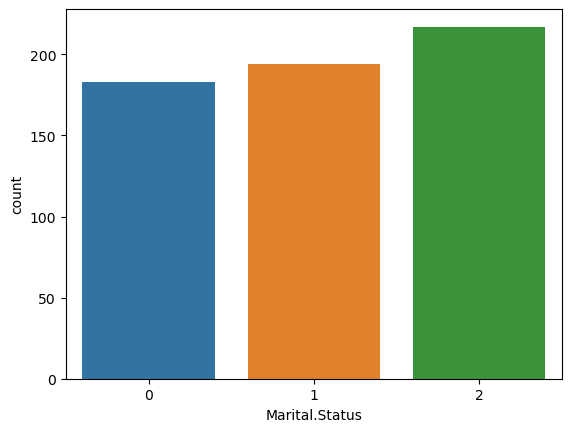

In [24]:
sns.countplot(x = data1['Marital.Status'])

<Axes: xlabel='Urban', ylabel='count'>

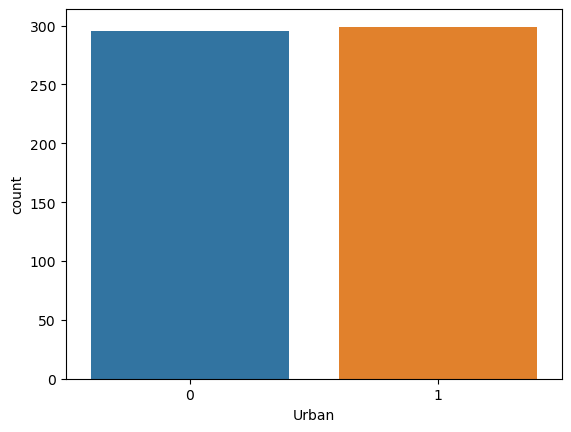

In [25]:
sns.countplot(x = data1['Urban'])

<Axes: xlabel='City.Population', ylabel='Density'>

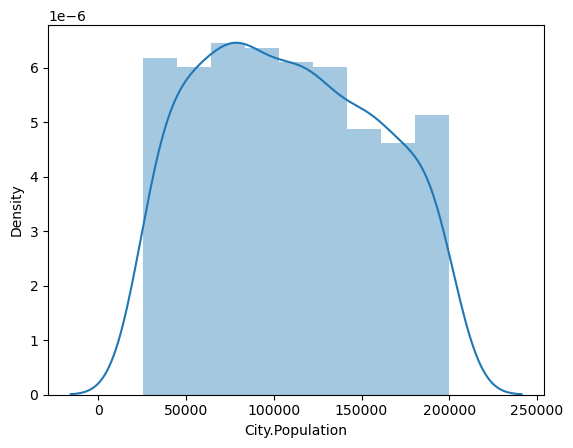

In [32]:
sns.distplot(data1['City.Population'])

<Axes: xlabel='Work.Experience', ylabel='Density'>

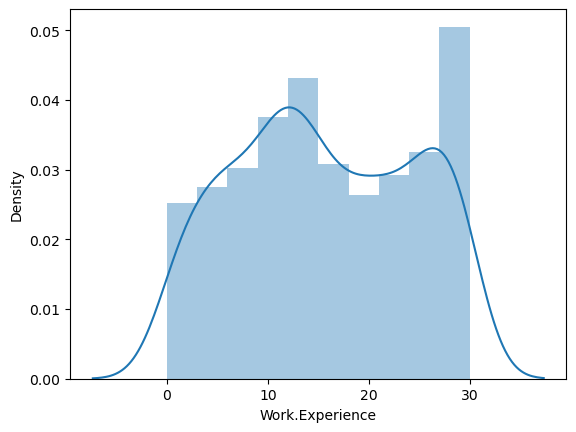

In [33]:
sns.distplot(data1['Work.Experience'])

In [34]:
x=data1.iloc[:,1:]
y=data1.iloc[:,0]

In [35]:
# Standerization
from sklearn.preprocessing import MinMaxScaler
MM=MinMaxScaler()
MM_x=MM.fit_transform(x)

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(MM_x,y,test_size=0.3,random_state=40)

In [37]:
x_train.shape, x_test.shape,y_train.shape,y_test.shape

((415, 5), (179, 5), (415,), (179,))

In [38]:
#by using entropy
from sklearn.tree import DecisionTreeClassifier
DT= DecisionTreeClassifier(criterion='entropy',max_depth=10)

In [39]:
DT.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [41]:
Y_pred_test= DT.predict(x_test)

In [42]:
DT.score(x_test, y_test)

1.0

In [43]:
np.mean(Y_pred_test==y_test)

1.0

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
cm=confusion_matrix(y_test,Y_pred_test)
cm

array([[179]], dtype=int64)

In [45]:
ac=accuracy_score(y_test,Y_pred_test)
print("accuracy score:",ac.round(2))

accuracy score: 1.0


In [46]:
DT.tree_.max_depth

0

In [47]:
DT.tree_.node_count

1

In [48]:
print(classification_report(y_test,Y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       179

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



In [49]:
#by using gini
DT1= DecisionTreeClassifier(criterion='gini',max_depth=9)

In [50]:
DT1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=9)

In [51]:
DT1.tree_.max_depth

0

In [52]:
Y_pred_test1= DT1.predict(x_test)
Y_pred_train1= DT1.predict(x_train)

In [53]:
DT1.score(x_test, y_test)

1.0

In [54]:
cm=confusion_matrix(y_test,Y_pred_test1)
cm

array([[179]], dtype=int64)

In [55]:
ac=accuracy_score(y_test,Y_pred_test1)
print("accuracy score:",ac.round(2))

accuracy score: 1.0


In [57]:
# Using grid search cv

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
tree_param = [{'criterion': ['entropy', 'gini'], 'max_depth': np.arange(3, 150)}]
model1 = DecisionTreeClassifier()
estimator = model1

clf = GridSearchCV(estimator,tree_param, cv=10)
clf.fit(x,y)

print(clf.best_score_)
print(clf.best_params_)

1.0
{'criterion': 'entropy', 'max_depth': 3}


In [58]:
tree_param1 = [{'min_samples_split':[2,3,4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30, 40, 50, 70, 90, 120,150],'min_samples_leaf':[2,3,4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30, 40, 50, 70, 90, 120,150]}]
clf2= GridSearchCV(estimator,tree_param1, cv=10)
clf2.fit(x,y)
print(clf2.best_score_)
print(clf2.best_params_)

1.0
{'min_samples_leaf': 2, 'min_samples_split': 2}


In [59]:
clf.best_params_,clf2.best_params_

({'criterion': 'entropy', 'max_depth': 3},
 {'min_samples_leaf': 2, 'min_samples_split': 2})

In [60]:
#fitting model on this data
model = DecisionTreeClassifier(criterion = 'gini',max_depth=3,min_samples_leaf=11,min_samples_split=150)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=11, min_samples_split=150)

In [61]:
pred_cv = model.predict(x_test)

In [62]:
acc = accuracy_score(y_test, pred_cv) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, pred_cv)

Accuracy = 100.0


array([[179]], dtype=int64)

In [63]:
#model validation

#Evaluate using a train and a test set

model1 =DecisionTreeClassifier(criterion = 'gini',max_depth=3, min_samples_split=150,min_samples_leaf=11)
model1.fit(x_train,y_train)
result = model1.score(x_test,y_test)
result*100

100.0

In [64]:
#Evaluate using Cross Validation

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
num_folds =10

kfold = KFold(n_splits=num_folds, random_state=None)
model2=DecisionTreeClassifier(criterion = 'gini',max_depth=3, min_samples_split=150,min_samples_leaf=11)
results = cross_val_score(model2,x,y, cv=kfold)

print(results.mean()*100.0)
print(results.std()*100)

100.0
0.0


In [65]:
# Evaluate using Leave One Out Cross Validation

from sklearn.model_selection import LeaveOneOut
loocv = LeaveOneOut()
model3 = DecisionTreeClassifier(criterion = 'gini',max_depth=3, min_samples_split=150,min_samples_leaf=11)
results = cross_val_score(model3,x,y,cv=loocv)

print(results.mean()*100.0)
print(results.std()*100)

100.0
0.0


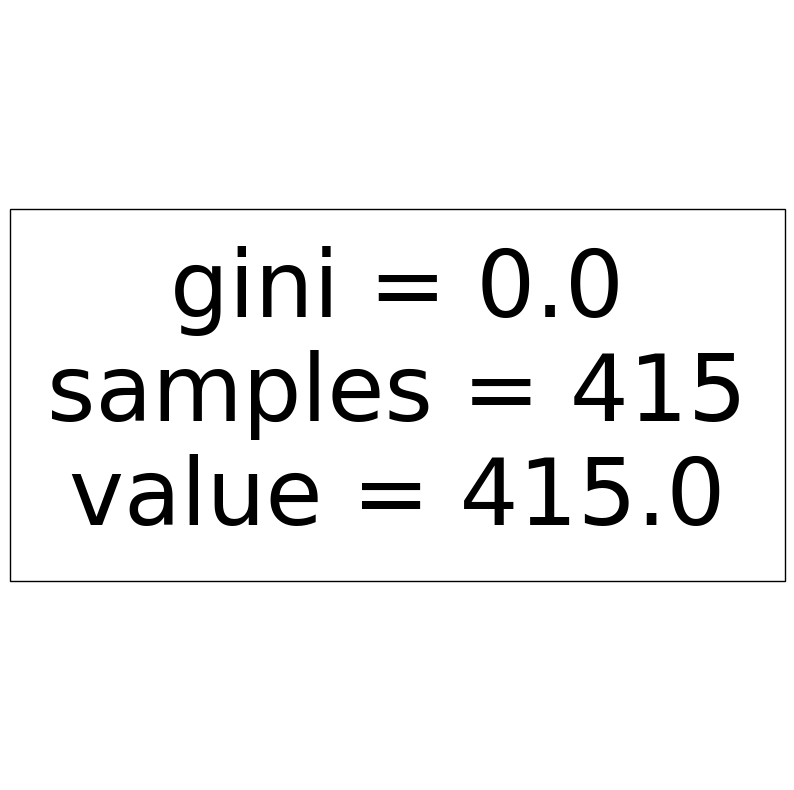

In [66]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(10,10))
model_L = DecisionTreeClassifier(criterion = 'gini',max_depth=3,min_samples_leaf=11,min_samples_split=150)
tree.plot_tree(model_L.fit(x_train,y_train));